1. Dona in test set means Mrs
2. Mlle = Miss
3. Mme = Mrs

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [5]:
temp=pd.read_csv("gender_submission.csv")

In [6]:
! ls

 gender_submission.csv	      submission.csv  'Titanic test1.ipynb'
 randomforestsubmission.csv   submissionnew    train.csv
 submission		      test.csv	      'Training Notebook.ipynb'


In [7]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")


In [8]:
#df_train.drop(["PassengerId"],axis=1,inplace=True)
#df_test.drop(["PassengerId"],axis=1,inplace=True)

## Creating the Title coulmns

In [9]:
df_train[["Last Name","First Name"]]=df_train["Name"].str.split(",",expand=True) 
df_test[["Last Name","First Name"]]=df_test["Name"].str.split(",",expand=True) 


In [10]:
df_train["Title"]=df_train["First Name"].str.split(".",expand=True)[0]
df_test["Title"]=df_test["First Name"].str.split(".",expand=True)[0]

In [11]:
df_train["First Name"]=df_train["First Name"].str.split(".",expand=True)[1]
df_test["First Name"]=df_test["First Name"].str.split(".",expand=True)[1]

In [12]:
df_train.drop(["Name"],axis=1,inplace=True)
df_test.drop(["Name"],axis=1,inplace=True)

## Imputing Titles


In [13]:
#w['female'] = w['female'].map({'female': 1, 'male': 0})
#df['BrandName'].replace(['ABC', 'AB'], 'A')
df_train["Title"]=df_train["Title"].replace([' Mlle',' Mme'],' Mrs')
df_test["Title"]=df_test["Title"].replace([' Dona'],' Mrs')

In [14]:
df_train["Cabin_num"]=df_train["Cabin"].str[:1]
df_test["Cabin_num"]=df_test["Cabin"].str[:1]


In [15]:
combined=pd.concat([df_train,df_test])

In [16]:
ans=pd.DataFrame(df_train.groupby("Title")["Survived"].value_counts().rename("count")).reset_index()

#ans.columns=["Title","Survived"]

In [17]:
combined.Age.isnull().sum()

263

In [18]:
df=df_train.copy()

In [19]:
df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

## Binning the age columns

In [65]:
# bins = [0,16,26,36,62,90]
# labels = [0,1,2,3,4] #labels
# #CREATE BUCKETS
# df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

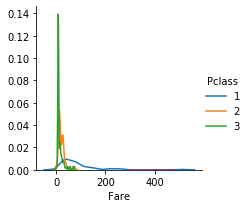

In [69]:
facet = sns.FacetGrid(df_train,hue="Pclass")
facet.map(sns.kdeplot,'Fare')
facet.add_legend()

## Imputing the Fare NaN value by the mean of a particular class 

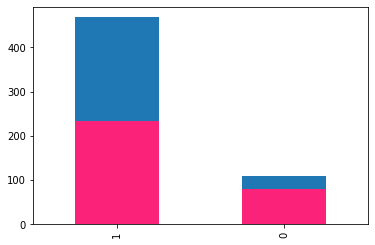

In [28]:
df_train.Survived[df_train.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df_train.Survived[df_train.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')

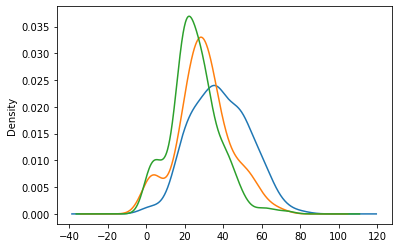

In [24]:
df_train.Age[df_train.Pclass == 1].plot(kind='kde')    
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')

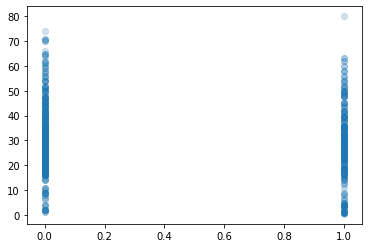

In [21]:
#fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
plt.scatter(df_train.Survived, df_train.Age, alpha=alpha_scatterplot)

In [607]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Last Name         0
First Name        0
Title             0
Cabin_num      1014
dtype: int64

## Imputing Missing Values

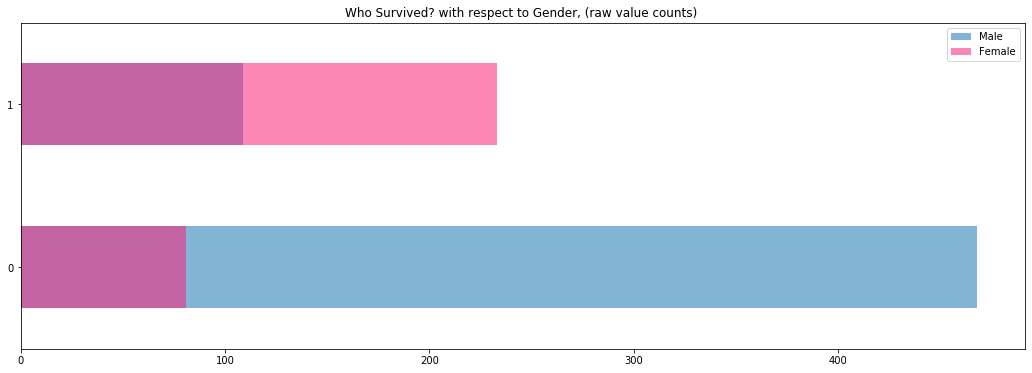

In [608]:
fig = plt.figure(figsize=(18,6))
df_male = df_train["Survived"][df_train["Sex"] == 'male'].value_counts().sort_index()
df_female = df_train.Survived[df_train.Sex == 'female'].value_counts().sort_index()
df_male
# ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
# ax1.set_ylim(-1, 2) 


In [609]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
combined["Age"]=pd.DataFrame(imputer.fit_transform(combined["Age"].values.reshape(-1,1)))
combined["Fare"]=pd.DataFrame(imputer.fit_transform(combined["Fare"].values.reshape(-1,1)))
combined["Embarked"]=pd.DataFrame(imp.fit_transform(combined["Embarked"].values.reshape(-1,1)))

## Normalizing the Fare distribution

In [610]:
combined['Fare'] = pd.qcut(combined.Fare, q=9, labels=np.arange(1,10))

In [618]:
k = SelectKBest(k=11)
k.fit(features, labels)
k_scores = (k.scores_)
features = k.transform(features)
test_df = k.transform(df_train)

NameError: name 'SelectKBest' is not defined

In [466]:
# from sklearn.preprocessing import power_transform
# combined["Fare"]=combined["Fare"]+1
# combined["Fare"]=power_transform(combined["Fare"].values.reshape(-1,1), method='box-cox')

In [612]:
combined.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,Title,Cabin_num
0,1,0.0,3,male,22.0,1,0,A/5 21171,1,NaN,S,Braund,Owen Harris,Mr,NaN
1,2,1.0,1,female,38.0,1,0,PC 17599,8,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs,C


In [613]:
combined = pd.get_dummies(combined,columns=["Pclass","Sex","Embarked","Title"])

In [614]:
combined.drop(["First Name","Last Name","Ticket","Cabin","Cabin_num"],axis=1,inplace=True)

In [615]:
df_train=combined.iloc[:891,]
df_test=combined.iloc[891:,]
df_train.drop(["PassengerId"],axis=1,inplace=True)
df_train["Survived"]=df_train["Survived"].astype(int)

In [1]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Model Training

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from operator import itemgetter
import xgboost as xgb
import random
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import datetime as dt

/home/bhavesh/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def run_single(train, test, features, target, random_state=0):    
    eta = 0.1
    max_depth= 8
    subsample = 1
    colsample_bytree =1
    n_estimators=1200
    start_time = time.time()

    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "n_estimators":n_estimators,
        "eta": eta,
        "tree_method": 'exact',
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        #"min_chil_weight":min_chil_weight,
        "seed": random_state,
        #"gamma":gamma
        #"num_class" : 22,
    }
    num_boost_round = 3000
    early_stopping_rounds = 100
    test_size = 0.1

   
    
    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    print('Length train:', len(X_train.index))
    print('Length valid:', len(X_valid.index))
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train, missing=-99)
    dvalid = xgb.DMatrix(X_valid[features], y_valid, missing =-99)

    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    print("Validating...")
    check = gbm.predict(xgb.DMatrix(X_valid[features]), ntree_limit=gbm.best_iteration+1)
    
    #area under the precision-recall curve
    score = average_precision_score(X_valid[target].values, check)
    print('area under the precision-recall curve: {:.6f}'.format(score))

    
    check2=check.round()
    score = precision_score(X_valid[target].values, check2)
    print('precision score: {:.6f}'.format(score))

    score = recall_score(X_valid[target].values, check2)
    print('recall score: {:.6f}'.format(score))
    #xgb.plot_importance(model, height=0.4, ax=ax)
    #imp = get_importance(gbm, features)
    #print('Importance array: ', imp)

    print("Trainin and prediction again test set... ")
    
    d_final = xgb.DMatrix(train[features], train[target], missing =-99)
    
    gbm = xgb.train(params, d_final)
    test_prediction = gbm.predict(xgb.DMatrix(test[features],missing = -99), ntree_limit=gbm.best_iteration+1)
    
    df_test["Survived"]=pd.DataFrame(test_prediction)
    
    xgb.plot_importance(gbm, height=0.4)
    
    #score = average_precision_score(test[target].values, test_prediction)

    #print('area under the precision-recall curve test set: {:.6f}'.format(score))
    
    ############################################ ROC Curve
    

 
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(X_valid[target].values, check)
    roc_auc = auc(fpr, tpr)
    #xgb.plot_importance(gbm)
    #plt.show()
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    ##################################################


    print('Training time: {} minutes'.format(round((time.time() - start_time)/60, 2)))
    return test_prediction,gbm

In [3]:
features = list(df_train.columns.values)
features.remove('Survived')

train, test = train_test_split(df_train, test_size=.1, random_state=random.seed(42))

preds,num_boost_rounds = run_single(df_train, df_test.drop(["PassengerId"],axis=1), features,'Survived',42)

NameError: name 'df_train' is not defined

In [428]:
df_test["Survived"]=df_test["Survived"].apply(lambda x: round(x))

In [429]:
submission=df_test[["PassengerId","Survived"]]

In [430]:
submission.to_csv("submission",index=False)